In [207]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/health-risk-prediction-anonymized-real-data/Health_Risk_Dataset.csv


In [208]:
df=pd.read_csv("/kaggle/input/health-risk-prediction-anonymized-real-data/Health_Risk_Dataset.csv")
df.head()

,Patient_ID,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,Consciousness,On_Oxygen,Risk_Level
0,P0522,25,96,1,97,107,37.5,A,0,Medium
1,P0738,28,92,2,116,151,38.5,P,1,High
2,P0741,29,91,1,79,135,38.4,A,0,High
3,P0661,24,96,1,95,92,37.3,A,0,Medium
4,P0412,20,96,1,97,97,37.4,A,0,Low


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient_ID         1000 non-null   object 
 1   Respiratory_Rate   1000 non-null   int64  
 2   Oxygen_Saturation  1000 non-null   int64  
 3   O2_Scale           1000 non-null   int64  
 4   Systolic_BP        1000 non-null   int64  
 5   Heart_Rate         1000 non-null   int64  
 6   Temperature        1000 non-null   float64
 7   Consciousness      1000 non-null   object 
 8   On_Oxygen          1000 non-null   int64  
 9   Risk_Level         1000 non-null   object 
dtypes: float64(1), int64(6), object(3)
memory usage: 78.3+ KB


In [210]:
df.describe()

,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,On_Oxygen
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,21.511000,92.59000,1.124000,106.160000,98.460000,37.921000,0.274000
std,5.287517,4.47302,0.329746,17.897562,19.694626,1.113696,0.446232
min,12.000000,74.00000,1.000000,50.000000,60.000000,35.600000,0.000000
25%,17.000000,90.00000,1.000000,94.000000,84.000000,37.100000,0.000000
50%,20.000000,94.00000,1.000000,109.000000,95.500000,37.800000,0.000000
75%,25.000000,96.00000,1.000000,119.000000,109.000000,38.600000,1.000000
max,40.000000,100.00000,2.000000,146.000000,163.000000,41.800000,1.000000


In [211]:
df.shape

(1000, 10)

In [212]:
df.isnull().sum()

Patient_ID           0
Respiratory_Rate     0
Oxygen_Saturation    0
O2_Scale             0
Systolic_BP          0
Heart_Rate           0
Temperature          0
Consciousness        0
On_Oxygen            0
Risk_Level           0
dtype: int64

In [213]:
df.duplicated().sum()

0

In [214]:
df.sample(3)

,Patient_ID,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,Consciousness,On_Oxygen,Risk_Level
170,P0362,23,94,1,113,75,37.0,A,0,Low
399,P0998,29,88,1,95,128,39.0,C,1,High
410,P0517,20,90,1,112,104,38.1,A,0,Medium


<Axes: xlabel='On_Oxygen', ylabel='Respiratory_Rate'>

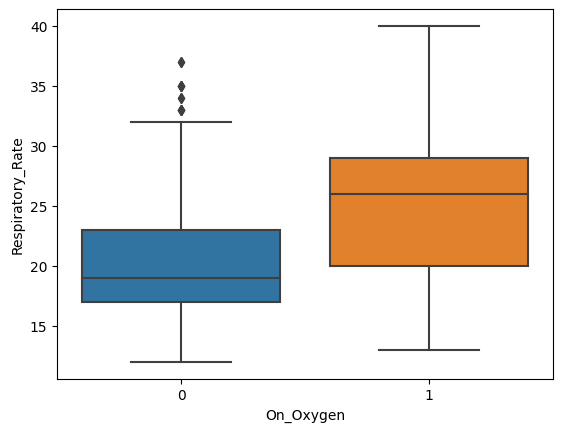

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x=df["On_Oxygen"],y=df["Respiratory_Rate"])

<Axes: xlabel='Temperature', ylabel='Heart_Rate'>

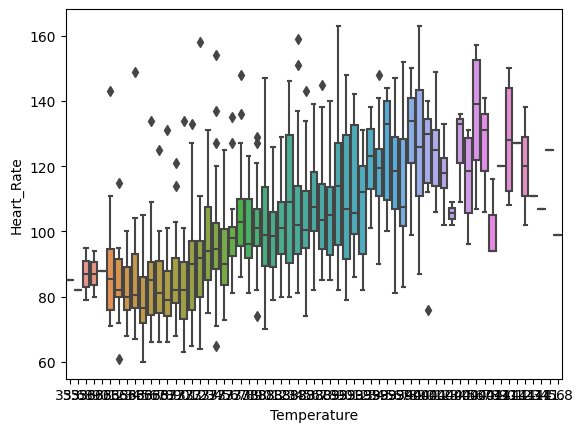

In [216]:
sns.boxplot(x=df["Temperature"],y=df["Heart_Rate"])

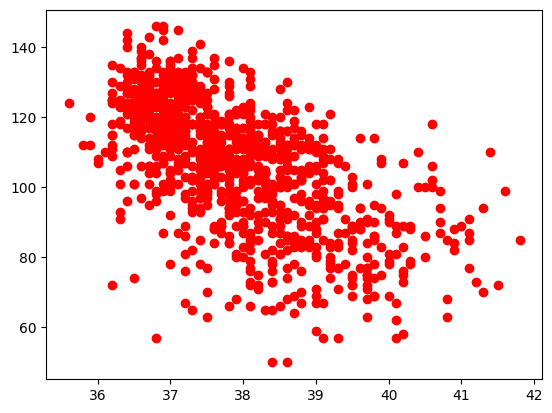

In [217]:
plt.scatter(x=df["Temperature"],y=df["Systolic_BP"],color="red")

<Axes: xlabel='On_Oxygen', ylabel='Risk_Level'>

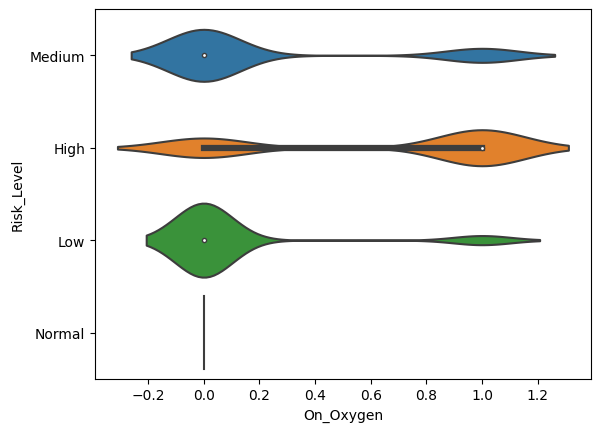

In [218]:
sns.violinplot(x=df["On_Oxygen"],y=df["Risk_Level"])

In [219]:
df.sample(3)

,Patient_ID,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,Consciousness,On_Oxygen,Risk_Level
994,P0072,15,97,1,118,73,37.1,A,0,Normal
879,P0157,17,96,1,126,67,36.6,A,0,Normal
502,P0396,17,95,1,115,81,37.9,A,0,Low


In [220]:
df=pd.DataFrame(df)

In [221]:
pd.get_dummies(df, columns=["Consciousness","Risk_Level"])

,Patient_ID,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,On_Oxygen,Consciousness_A,Consciousness_C,Consciousness_P,Consciousness_U,Consciousness_V,Risk_Level_High,Risk_Level_Low,Risk_Level_Medium,Risk_Level_Normal
0,P0522,25,96,1,97,107,37.5,0,True,False,False,False,False,False,False,True,False
1,P0738,28,92,2,116,151,38.5,1,False,False,True,False,False,True,False,False,False
2,P0741,29,91,1,79,135,38.4,0,True,False,False,False,False,True,False,False,False
3,P0661,24,96,1,95,92,37.3,0,True,False,False,False,False,False,False,True,False
4,P0412,20,96,1,97,97,37.4,0,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P0107,18,96,1,124,72,37.2,0,True,False,False,False,False,False,False,False,True
996,P0271,19,95,1,129,70,38.1,0,True,False,False,False,False,False,True,False,False
997,P0861,39,82,1,101,137,37.5,1,True,False,False,False,False,True,False,False,False
998,P0436,15,92,1,106,108,38.6,0,True,False,False,False,False,False,False,True,False


In [222]:
pd.get_dummies(df, columns=["Consciousness","Risk_Level"], drop_first=True)

,Patient_ID,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,On_Oxygen,Consciousness_C,Consciousness_P,Consciousness_U,Consciousness_V,Risk_Level_Low,Risk_Level_Medium,Risk_Level_Normal
0,P0522,25,96,1,97,107,37.5,0,False,False,False,False,False,True,False
1,P0738,28,92,2,116,151,38.5,1,False,True,False,False,False,False,False
2,P0741,29,91,1,79,135,38.4,0,False,False,False,False,False,False,False
3,P0661,24,96,1,95,92,37.3,0,False,False,False,False,False,True,False
4,P0412,20,96,1,97,97,37.4,0,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P0107,18,96,1,124,72,37.2,0,False,False,False,False,False,False,True
996,P0271,19,95,1,129,70,38.1,0,False,False,False,False,True,False,False
997,P0861,39,82,1,101,137,37.5,1,False,False,False,False,False,False,False
998,P0436,15,92,1,106,108,38.6,0,False,False,False,False,False,True,False


In [223]:
cols = [col for col in df_encoded.columns if "Risk_Level" in col]
df_encoded[cols] = df_encoded[cols].astype(int)

In [224]:
df_encoded

,Patient_ID,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,Consciousness,On_Oxygen,Risk_Level
0,521,25,96,1,97,107,37.5,0,0,2
1,737,28,92,2,116,151,38.5,2,1,0
2,740,29,91,1,79,135,38.4,0,0,0
3,660,24,96,1,95,92,37.3,0,0,2
4,411,20,96,1,97,97,37.4,0,0,1
...,...,...,...,...,...,...,...,...,...,...
995,106,18,96,1,124,72,37.2,0,0,3
996,270,19,95,1,129,70,38.1,0,0,1
997,860,39,82,1,101,137,37.5,0,1,0
998,435,15,92,1,106,108,38.6,0,0,2


In [225]:
cols = [col for col in df_encoded.columns if "Consciousness_C" in col]
df_encoded[cols] = df_encoded[cols].astype(int)

In [226]:
cols = [col for col in df_encoded.columns if "Consciousness_P" in col]
df_encoded[cols] = df_encoded[cols].astype(int)

In [227]:
cols = [col for col in df_encoded.columns if "Consciousness_U" in col]
df_encoded[cols] = df_encoded[cols].astype(int)

In [228]:
cols = [col for col in df_encoded.columns if "Consciousness_V" in col]
df_encoded[cols] = df_encoded[cols].astype(int)

In [229]:
df_encoded

,Patient_ID,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,Consciousness,On_Oxygen,Risk_Level
0,521,25,96,1,97,107,37.5,0,0,2
1,737,28,92,2,116,151,38.5,2,1,0
2,740,29,91,1,79,135,38.4,0,0,0
3,660,24,96,1,95,92,37.3,0,0,2
4,411,20,96,1,97,97,37.4,0,0,1
...,...,...,...,...,...,...,...,...,...,...
995,106,18,96,1,124,72,37.2,0,0,3
996,270,19,95,1,129,70,38.1,0,0,1
997,860,39,82,1,101,137,37.5,0,1,0
998,435,15,92,1,106,108,38.6,0,0,2


In [230]:
X = df_encoded.drop(["Risk_Level"], axis=1)   # features
y = df_encoded[["Risk_Level"]]   # target (multi-output)

In [231]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [234]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

/tmp/ipykernel_36/1657824069.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [235]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        40

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [236]:
new_patient = [[1001,98.6, 120, 85, 96, 20, 1, 0, 0]]  
# (temperature, systolic_bp, heart_rate, oxygen_saturation, resp_rate, etc. + encoded columns)

print("Predicted Risk:", model.predict(new_patient))

Predicted Risk: [0]


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [239]:
from sklearn.linear_model import LogisticRegression

In [242]:
clf=LogisticRegression()

In [243]:
clf.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [246]:
y_pred = clf.predict(X_train)  # only pass X

In [248]:
print(X.shape)
print(y.shape)

(1000, 9)
(1000, 1)


In [250]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, y_train.shape)  # (800, 9), (800, 1)
print(X_test.shape, y_test.shape)    # (200, 9), (200, 1)

(800, 9) (800, 1)
(200, 9) (200, 1)


In [251]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

clf = LogisticRegression()
clf.fit(X_train, y_train)       # y_train is (800,1), works fine
y_pred = clf.predict(X_test)    # only X_test

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [253]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_scaled, y_train.values.ravel())

# Predict
y_pred = clf.predict(X_test_scaled)

# Evaluationing model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        58
           1       1.00      0.98      0.99        45
           2       0.97      1.00      0.98        57
           3       1.00      1.00      1.00        40

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



Logistic Regression is show 99% Accuracy score it is good but here not good if Our 100 customer check than 1 has give wrong ans but upper 
**Random forest give correct 100% Accuracy score**
> Than if any patient all data than give *Risklevel*

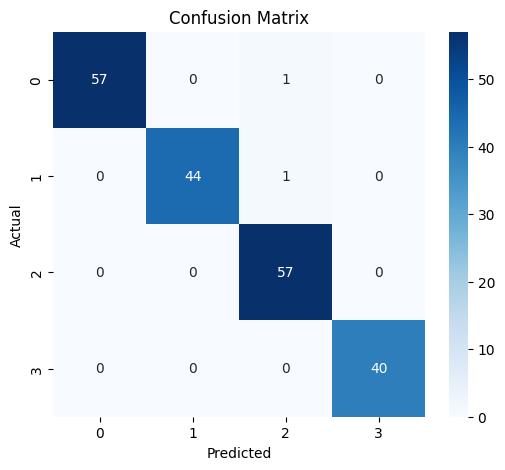

In [258]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

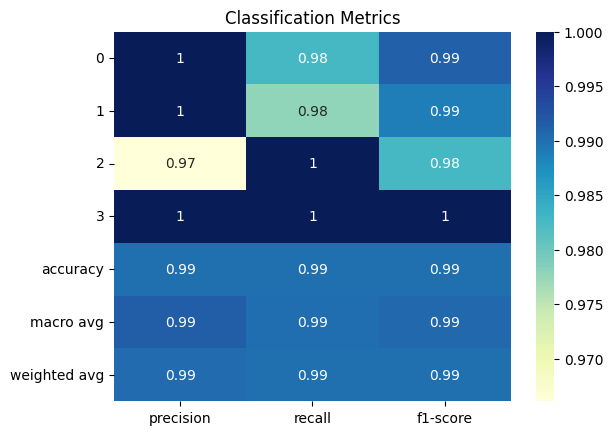

In [259]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).iloc[:-1, :].T  # remove accuracy row

sns.heatmap(df_report, annot=True, cmap="YlGnBu")
plt.title("Classification Metrics")
plt.show()

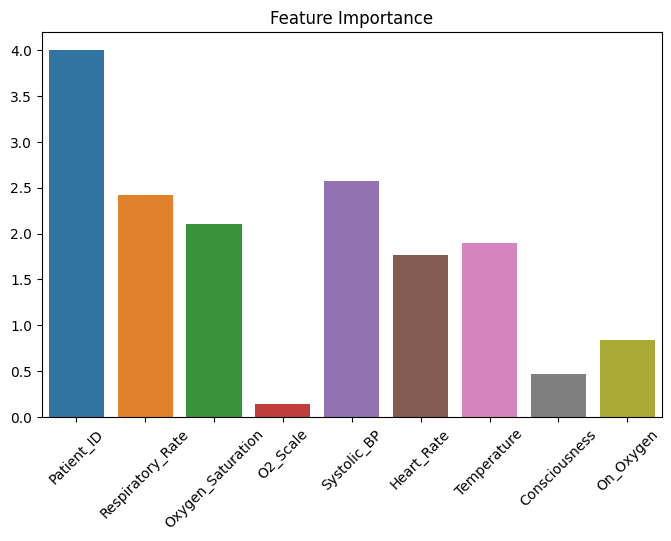

In [260]:
# Example for Logistic Regression
import numpy as np

feature_importance = np.abs(clf.coef_[0])  # absolute value of coefficients
features = X_train.columns

plt.figure(figsize=(8,5))
sns.barplot(x=features, y=feature_importance)
plt.xticks(rotation=45)
plt.title("Feature Importance")
plt.show()

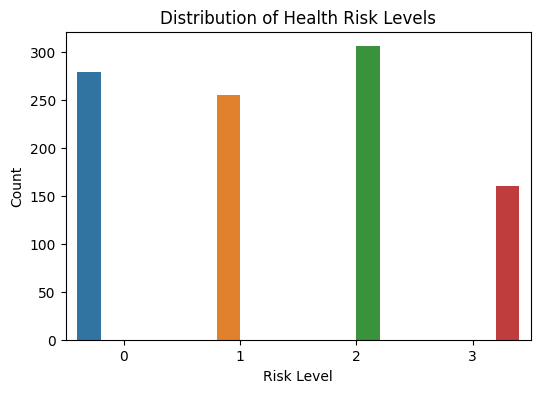

In [266]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_encoded, x="Risk_Level", hue="Risk_Level")
plt.title("Distribution of Health Risk Levels")
plt.xlabel("Risk Level")
plt.ylabel("Count")
plt.legend([],[], frameon=False)  # Hides duplicate legend
plt.show()

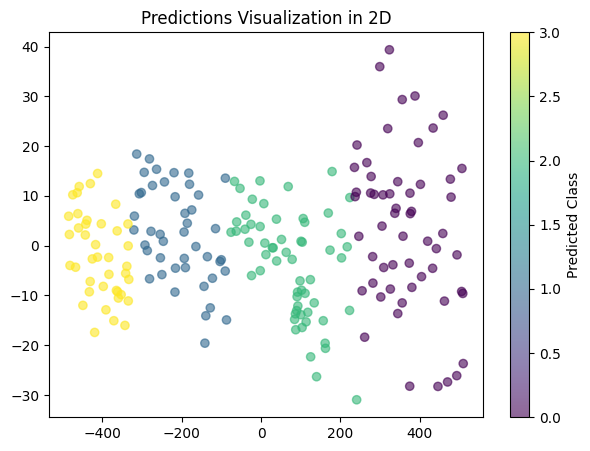

In [261]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_pred, cmap='viridis', alpha=0.6)
plt.colorbar(label='Predicted Class')
plt.title('Predictions Visualization in 2D')
plt.show()

In [269]:
import pickle

In [270]:
pickle.dump(clf,open('model.pkl','wb'))